In [5]:
# Set environment params
Sys.setenv(LANG='en')  # English

# Import libraries
library(data.table)  # Data manipulate
library(mlr)         # ML toolkit
library(caret)       # ML toolkit
library(ggplot2)     # Visualization
library(pROC)        # AUC, ROC
library(e1071)       # Evaluation
library(gridExtra)   # Visualization
library(kknn)        # kNN model
library(nnet)        # One-vs-All Logistic Regression
library(dummies)     # Data processing

# Import data
library(ISLR)      # Data from the course book
library(MASS)      # Boston housing dataset

library(datasets)  # US crime dataset

# Resize plot
library(repr)  # String and binary representations
#options(repr.plot.width=4, repr.plot.height=4)

R.version.string

Loading required package: ParamHelpers

Warning message: 'mlr' is in 'maintenance-only' mode since July 2019.
Future development will only happen in 'mlr3'
(<https://mlr3.mlr-org.com>). Due to the focus on 'mlr3' there might be
uncaught bugs meanwhile in {mlr} - please consider switching.

Loading required package: ggplot2

Loading required package: lattice


Attaching package: 'lattice'


The following object is masked from 'package:boot':

    melanoma



Attaching package: 'caret'


The following object is masked from 'package:mlr':

    train


Type 'citation("pROC")' for a citation.


Attaching package: 'pROC'


The following objects are masked from 'package:stats':

    cov, smooth, var



Attaching package: 'e1071'


The following object is masked from 'package:mlr':

    impute




ERROR: Error in library(gridExtra): there is no package called 'gridExtra'


In [ ]:
# Exercise 3
#(a) It is implemented by randomly dividing set of observations itno k groups or folds of eaual size. The first fold is treated as the 
#validation set and the model is fitted on the remaining folds. This procedure is repeated several times with different nodes eac time.

#(b) K fold has lower variablity than validation set.
    #Validation set is easier to grasp as compare to K fold.
#In case of LOOCV and K fold the K fold gives more accurate reults.
    #LOOCV in some cases requires less computational power than K fold.

In [6]:
library(ISLR)
df <- Default

In [8]:
# Exercise 8
#(a)
set.seed(123)
x = rnorm(100)
y = x-2*x^2+rnorm(100)

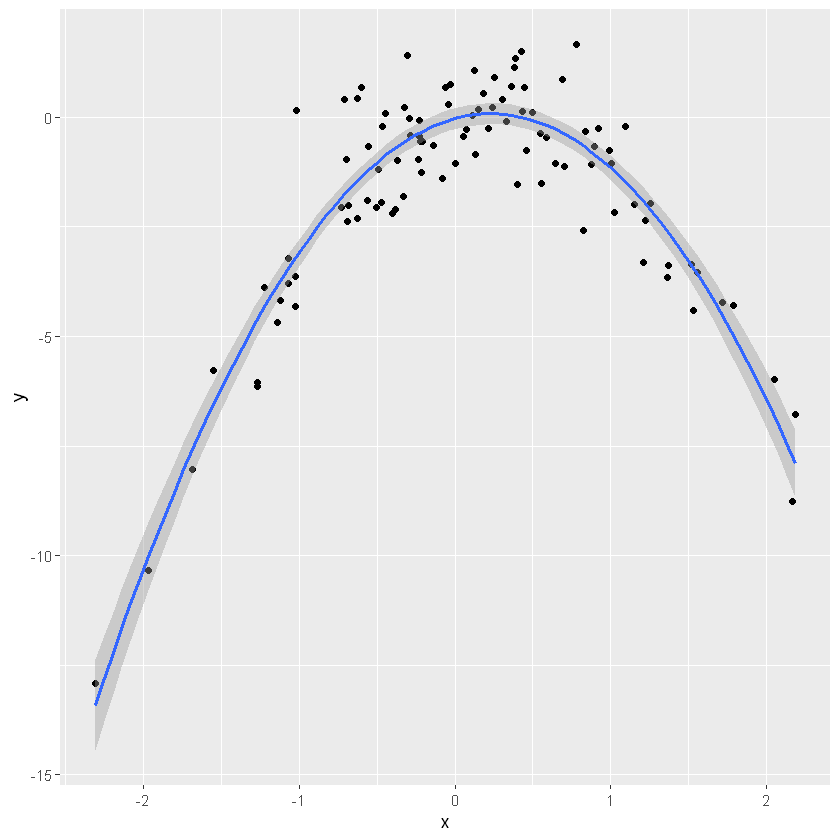

In [9]:
#(b)
ggplot(mapping = aes(x=x , y=y)) + 
geom_point() + geom_smooth(method = "lm", formula = "y ~ x + I(x^2)")

In [ ]:
# We can observe that least square fits the model well

In [10]:
#(c)
library(boot)
Data = data.frame(x, y)
set.seed(123)
# 1
glm.fit = glm(y ~ x)
cv.glm(Data, glm.fit)$delta

[1] 6.975212 6.972065

In [11]:
#2
glm.fit = glm(y ~ poly(x, 2))
cv.glm(Data, glm.fit)$delta

[1] 0.9664678 0.9661936

In [12]:
#3
glm.fit = glm(y ~ poly(x, 3))
cv.glm(Data, glm.fit)$delta

[1] 1.0000174 0.9995299

In [13]:
#4
glm.fit = glm(y ~ poly(x, 4))
cv.glm(Data, glm.fit)$delta

[1] 0.9993215 0.9987809

In [ ]:
#(d)
#Same as (c) because LOOCV is same

In [ ]:
#(e)
# The quadratic polynomail had the lowest LOOCV error.

In [ ]:
#Exercise 6
#1
#(a) subset selection
#(b) Subset Selection
#(c) True, True, False, True, False

In [15]:
#9
#1
library(ISLR)
set.seed(123)

In [16]:
train.size = dim(College)[1] / 2
train = sample(1:dim(College)[1], train.size)
test = -train
train_College = College[train, ]
test_College = College[test, ]

In [22]:
#2
fit = lm(Apps~., data=train_College)
predict = predict(lm.fit, test_College)
mean((test_College[, "Apps"] - lm.pred)^2)

[1] 1373995